# **Data Exploration and Correlation Studies**

## Objectives

* **Business Requirement 1:**
    * Investigate the relationship between house attributes and sale prices.
    * Conduct a detailed correlation study using both Spearman and Pearson methods.
    * Visualize the strength of correlations with sale price.
    * Generate plots for the variables that show the highest correlations with sale price to derive actionable insights.

## Inputs

* The cleaned datasets from the previous notebook:
  * `outputs/datasets/collection/HousePricing.csv`
  * `outputs/datasets/collection/InheritedHouses.csv`

## Outputs

* Visualizations showing relationships between key house attributes and `SalePrice`.
* Correlation matrices (Pearson and Spearman) to identify the most relevant variables.
* Summary of insights derived from the data.


---

## Install Python packages in the Notebook

In [1]:
%pip install -r /workspace/HeritageHousing/requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Change working directory

Before starting we need to change to the correct directory (from where it is to its parent folder).

We first access the current directory using os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/HeritageHousing/notebooks'

We want to make the parent of the current directory the new current directory.

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Below will confirm the current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/HeritageHousing'

## Libraries Import

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Load the Data

Load the datasets

In [6]:
df = pd.read_csv('outputs/datasets/collection/HousePricing.csv')
inherited_houses = pd.read_csv('outputs/datasets/collection/InheritedHouses.csv')

Display the first few rows to ensure the data loaded correctly

In [7]:
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Basic Summary of the Data

Summary of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Descriptive statistics

In [9]:
df.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000


## Check for Missing Values

Check for missing values in the dataframe

In [10]:
df.isnull().sum().sort_values(ascending=False)

EnclosedPorch    1324
WoodDeckSF       1305
LotFrontage       259
GarageFinish      235
BsmtFinType1      145
BedroomAbvGr       99
2ndFlrSF           86
GarageYrBlt        81
BsmtExposure       38
MasVnrArea          8
1stFlrSF            0
BsmtFinSF1          0
BsmtUnfSF           0
GrLivArea           0
LotArea             0
GarageArea          0
KitchenQual         0
OpenPorchSF         0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

## Handling Missing Values

**Handle missing values based on the nature of the data in each column.**

* EnclosedPorch and WoodDeckSF:
    * Missing values likely indicate the absence of these features. Replace with 0.

In [11]:
df['EnclosedPorch'].fillna(0, inplace=True)
df['WoodDeckSF'].fillna(0, inplace=True)

/tmp/ipykernel_2112/4014921638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EnclosedPorch'].fillna(0, inplace=True)
/tmp/ipykernel_2112/4014921638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

* LotFrontage:
    * This is a critical numerical feature. Replace missing values with the median of LotFrontage.

In [12]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

/tmp/ipykernel_2112/3505941688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


* GarageFinish and GarageYrBlt:
    * Missing values likely indicate no garage. Replace GarageFinish with 'No Garage' and GarageYrBlt with 0.

In [13]:
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)

/tmp/ipykernel_2112/674028932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageFinish'].fillna('No Garage', inplace=True)
/tmp/ipykernel_2112/674028932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

* BsmtFinType1 and BsmtExposure:
    * Missing values likely indicate no basement. Replace with 'No Basement' and 'No Exposure'.

In [14]:
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Exposure', inplace=True)

/tmp/ipykernel_2112/737729879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFinType1'].fillna('No Basement', inplace=True)
/tmp/ipykernel_2112/737729879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

* BedroomAbvGr:
    * Unusual to have missing values. Fill with the mode (most common number of bedrooms).

In [15]:
df['BedroomAbvGr'].fillna(df['BedroomAbvGr'].mode()[0], inplace=True)

/tmp/ipykernel_2112/4052119199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BedroomAbvGr'].fillna(df['BedroomAbvGr'].mode()[0], inplace=True)


* 2ndFlrSF:
    * Missing values likely indicate no second floor. Replace with 0.

In [16]:
df['2ndFlrSF'].fillna(0, inplace=True)

/tmp/ipykernel_2112/3624898832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['2ndFlrSF'].fillna(0, inplace=True)


* MasVnrArea:
    * Missing values likely indicate no masonry veneer. Replace with 0.

In [17]:
df['MasVnrArea'].fillna(0, inplace=True)

/tmp/ipykernel_2112/3778718730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(0, inplace=True)


## Feature Engineering

Given that we are trying to find the corraltion between house attributes and sale price I think it would make sense to have a total sq footage column made up of total of 1st floor, 2nd floor, and basement square footage.

Create a new feature for total square footage

In [18]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

Inspect the new feature

In [19]:
df[['TotalSF', 'SalePrice']].head()

,TotalSF,SalePrice
0,2566.0,208500
1,2524.0,181500
2,2706.0,223500
3,1717.0,140000
4,2290.0,250000


Before proceeding to the corrolation tests we will check and print out which columns have categorical data first.

In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')


We will use label encoding as this method will convert the categorical variables into numeric codes. Since the categories likely have an inherent order (e.g., Gd > Av > Mn > No), label encoding is appropriate.

List of categorical columns

In [21]:
categorical_cols = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

Check unique values in each categorical column before encoding

In [22]:
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'No Exposure']
Unique values in BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'No Basement' 'BLQ' 'LwQ']
Unique values in GarageFinish: ['RFn' 'Unf' 'No Garage' 'Fin']
Unique values in KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']


Define mappings for each categorical column

In [23]:
bsmt_exposure_mapping = {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3, 'No Exposure': 4}
bsmt_fin_type_mapping = {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
garage_finish_mapping = {'No Garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
kitchen_qual_mapping = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}

Apply the mappings

In [24]:
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_mapping)
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_type_mapping)
df['GarageFinish'] = df['GarageFinish'].map(garage_finish_mapping)
df['KitchenQual'] = df['KitchenQual'].map(kitchen_qual_mapping)

Check the DataFrame after mapping

In [25]:
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice,TotalSF
0,856,854.0,3.0,0,706,6,150,0.0,548,2,...,196.0,61,5,7,856,0.0,2003,2003,208500,2566.0
1,1262,0.0,3.0,3,978,5,284,0.0,460,2,...,0.0,0,8,6,1262,0.0,1976,1976,181500,2524.0
2,920,866.0,3.0,1,486,6,434,0.0,608,2,...,162.0,42,5,7,920,0.0,2001,2002,223500,2706.0
3,961,0.0,3.0,0,216,5,540,0.0,642,1,...,0.0,35,5,7,756,0.0,1915,1970,140000,1717.0
4,1145,0.0,4.0,2,655,6,490,0.0,836,2,...,350.0,84,5,8,1145,0.0,2000,2000,250000,2290.0


## Exploratory Data Analysis (EDA) - Correlation Matrices

Calculate and visualize the Pearson and Spearman correlation matrices.

* **Pearson Correlation Matrix:**
    * Measures the linear relationship between variables.

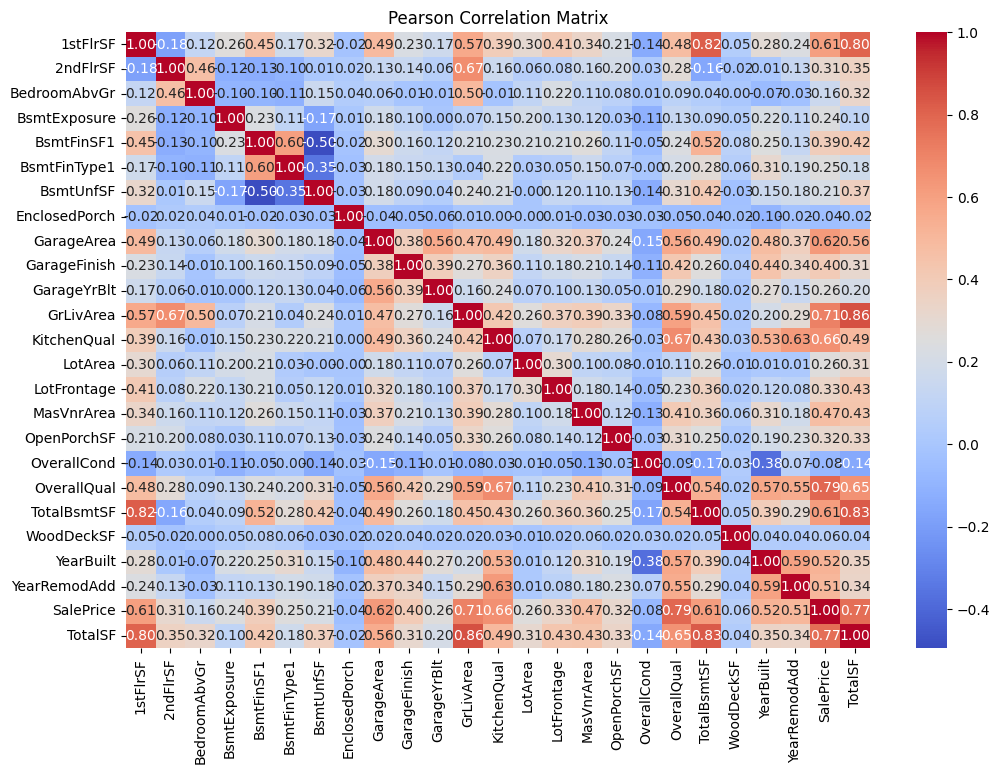

In [26]:
plt.figure(figsize=(12, 8))
pearson_corr = df.corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

* **Spearman Correlation Matrix:**
    * Measures the monotonic relationship between variables (whether linear or not).

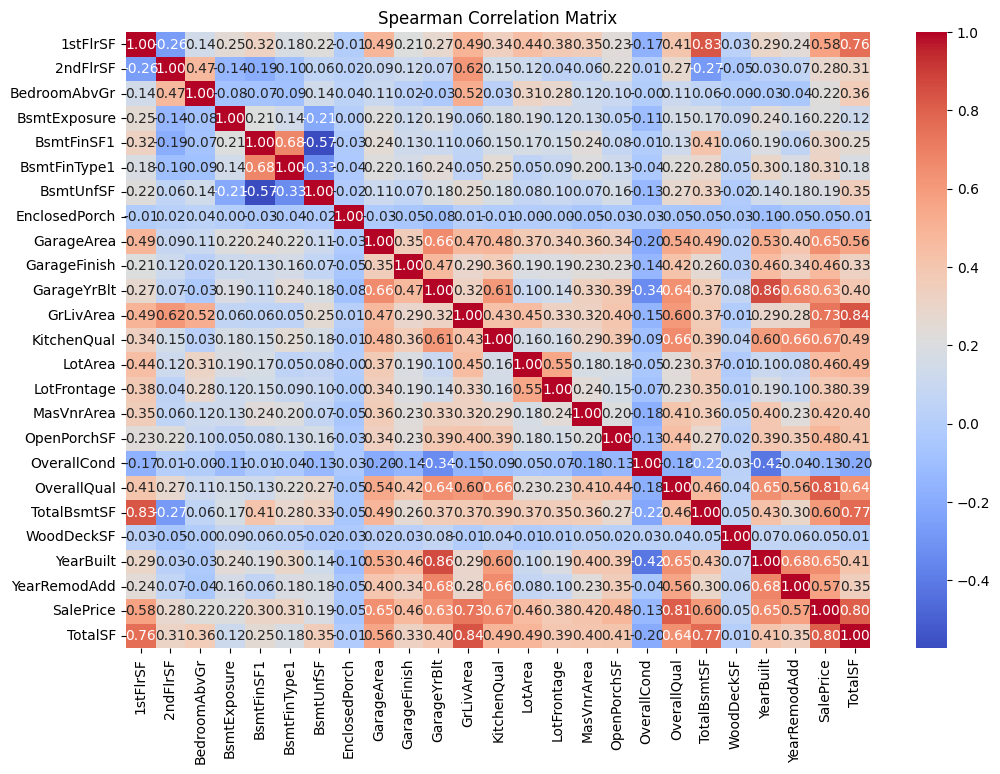

In [27]:
plt.figure(figsize=(12, 8))
spearman_corr = df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

## Pearson Correlation (Linear Relationships):

#### Positive Correlation

* **OverallQual:** Correlation of 0.79 - This indicates that the overall quality of the house has a strong positive linear relationship with the sale price.

* **GrLivArea:** Correlation of 0.71 - The above-ground living area also shows a strong positive linear correlation with the sale price.

* **TotalSF:** Correlation of 0.77 - The total square footage (which likely includes both above-ground and basement space) is also strongly correlated with the sale price.

* **GarageArea:** Correlation of 0.62 - The size of the garage has a moderate positive linear correlation with the sale price.

* **YearBuilt:** Correlation of 0.59 - Newer houses tend to have a higher sale price.

## Spearman Correlation (Monotonic Relationships):

#### Positive Correlation

* **OverallQual:** Correlation of 0.80 - This suggests that overall quality is very strongly associated with higher sale prices, even in a non-linear way.

* **GrLivArea:** Correlation of 0.73 - This shows a strong monotonic relationship between living area and sale price.

* **TotalSF:** Correlation of 0.80 - This confirms the strong relationship between total square footage and sale price.

* **GarageArea:** Correlation of 0.66 - The garage area remains moderately correlated with sale price in a monotonic way.

* **YearBuilt:** Correlation of 0.59 - Again, newer houses tend to have higher sale prices, and this relationship is consistent even in a monotonic sense.

**Lets plot these correlations to salesprice to get a better understanding of the findings**

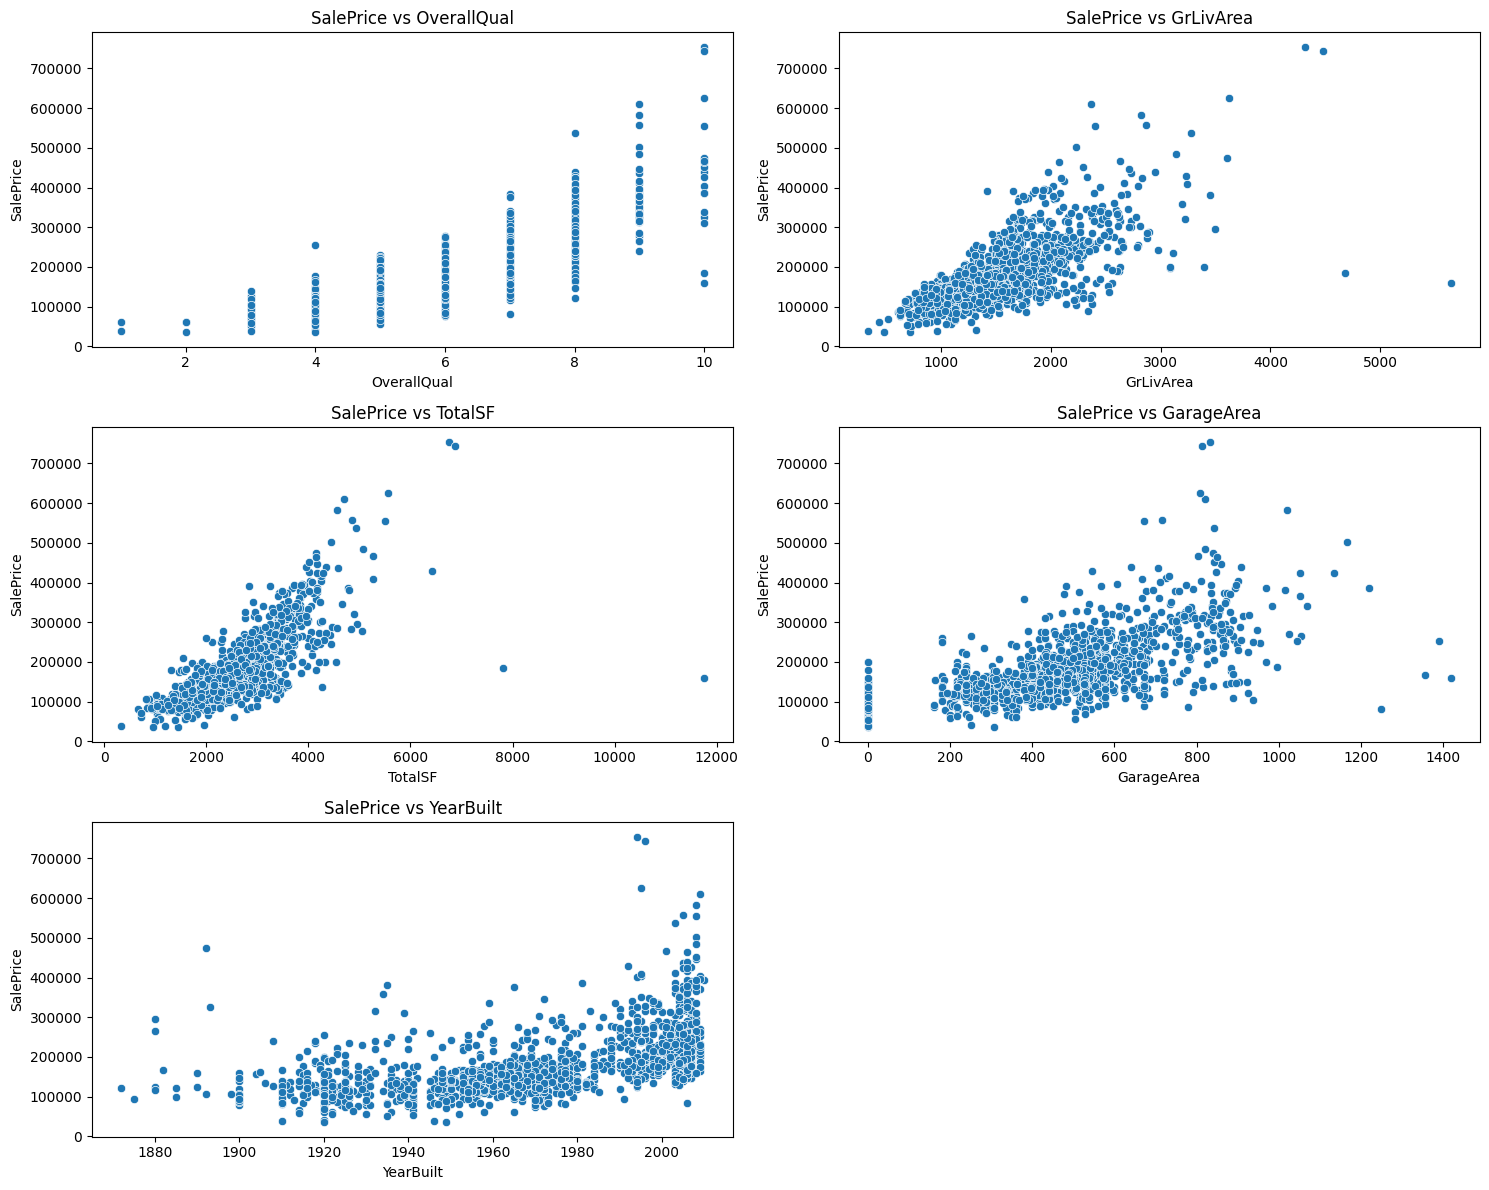

In [28]:
key_attributes = ['OverallQual', 'GrLivArea', 'TotalSF', 'GarageArea', 'YearBuilt']

plt.figure(figsize=(15, 12))

for i, attribute in enumerate(key_attributes, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df[attribute], y=df['SalePrice'])
    plt.title(f'SalePrice vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

## Pearson Correlation (Linear Relationships):

#### Negative Correlation

* **BsmtFinType1:** Correlation of 0.01 - Indicates almost no linear relationship with the sale price.

* **BsmtUnfSF:** Correlation of 0.18 - Very weak correlation with the sale price.

* **EnclosedPorch:** Correlation of 0.05 - Very little correlation with the sale price.

* **BedroomAbvGr:** Correlation of 0.16 - Weak correlation with sale price.

* **LotFrontage:** Correlation of 0.26 - Weak correlation with sale price.

## Spearman Correlation (Monotonic Relationships):

#### Negative Correlation

* **EnclosedPorch:** Correlation of 0.05 - Almost no monotonic relationship with the sale price.

* **BsmtFinType1:** Correlation of 0.06 - Very weak monotonic relationship with the sale price.

* **BsmtUnfSF:** Correlation of 0.18 - Weak monotonic relationship with the sale price.

* **LotFrontage:** Correlation of 0.29 - Weak monotonic relationship with the sale price.

* **BedroomAbvGr:** Correlation of 0.47 - Somewhat weak monotonic relationship with the sale price.

**Lets plot these correlations to salesprice to get a better understanding of the findings**

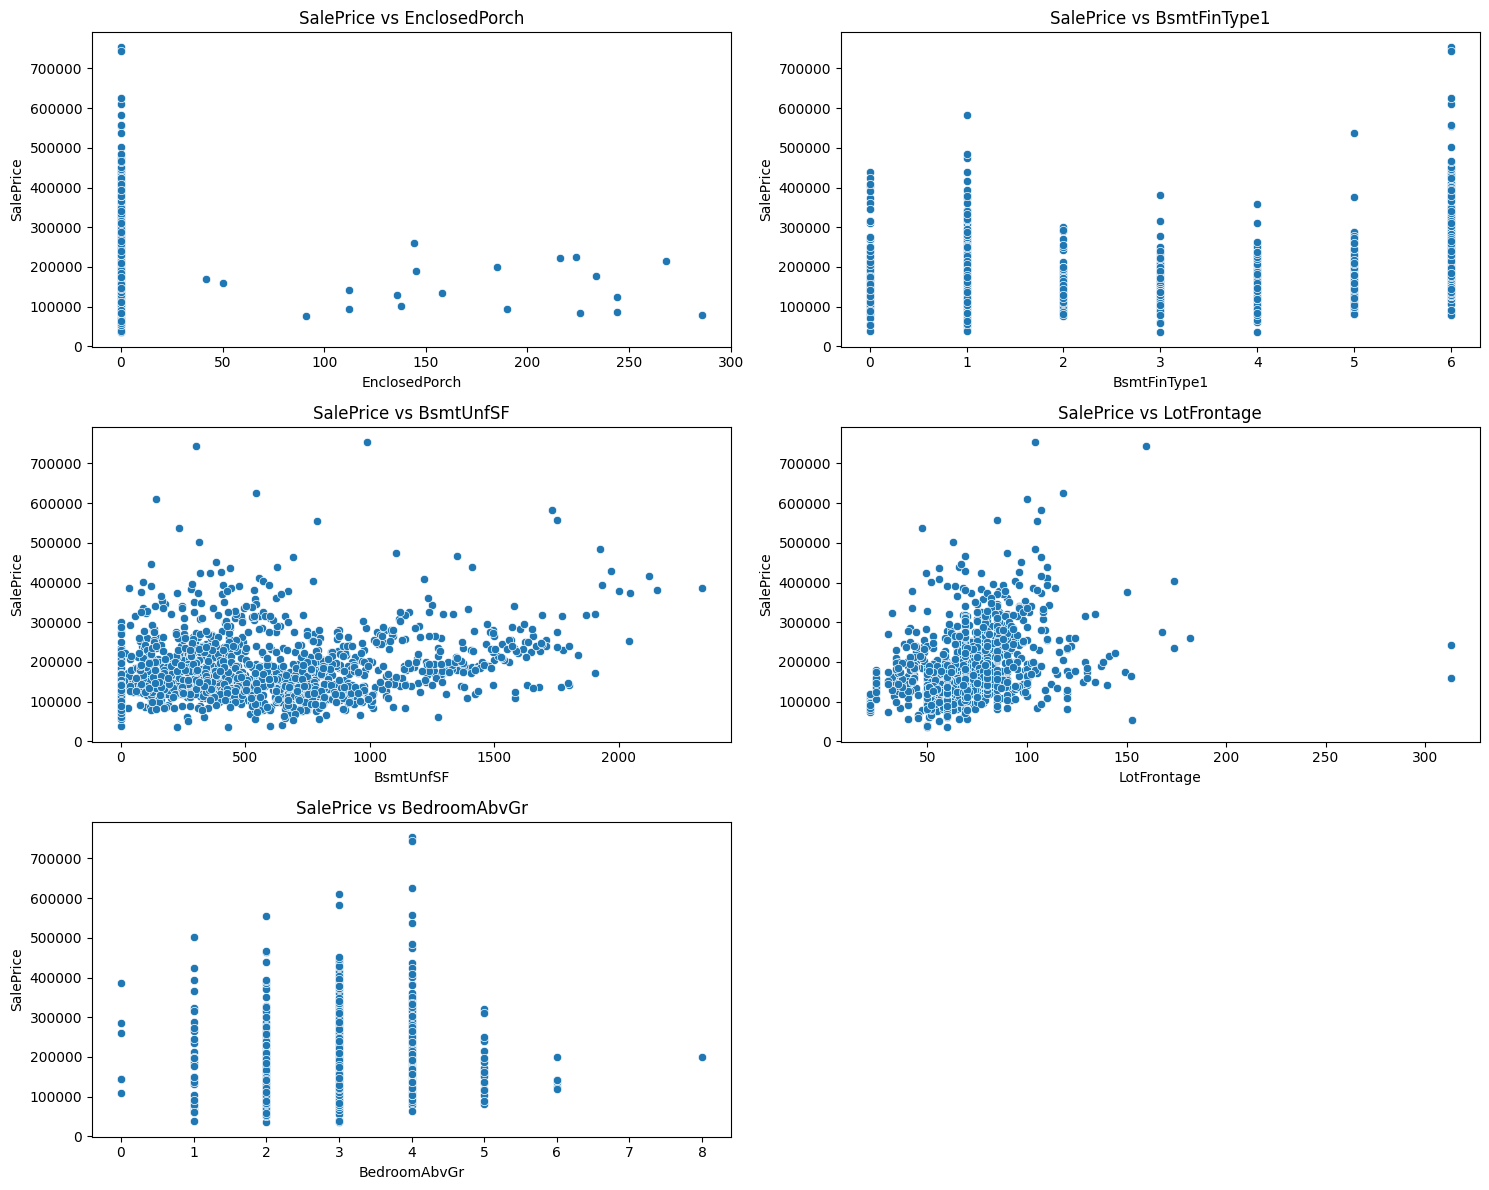

In [29]:
negative_attributes = ['EnclosedPorch', 'BsmtFinType1', 'BsmtUnfSF', 'LotFrontage', 'BedroomAbvGr']

plt.figure(figsize=(15, 12))

for i, attribute in enumerate(negative_attributes, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df[attribute], y=df['SalePrice'])
    plt.title(f'SalePrice vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

### **Summary of Key Takeaways from Correlation Studies and Scatter Plots**

#### **1. Strongly Correlated Attributes:**
- **OverallQual (Overall Quality):**
  - **Pearson Correlation:** 0.79
  - **Spearman Correlation:** 0.80
  - **Takeaway:** This is the most strongly correlated attribute with `SalePrice`. Higher quality homes tend to sell for significantly higher prices. The scatter plot shows a clear upward trend, indicating that as the quality rating increases, so does the sale price.

- **GrLivArea (Above Ground Living Area):**
  - **Pearson Correlation:** 0.71
  - **Spearman Correlation:** 0.73
  - **Takeaway:** The living area square footage is a strong predictor of sale price. Larger homes generally command higher prices. The scatter plot demonstrates a positive linear relationship, with some outliers where large homes do not fetch high prices, potentially due to other factors.

- **TotalSF (Total Square Footage):**
  - **Pearson Correlation:** 0.77
  - **Spearman Correlation:** 0.80
  - **Takeaway:** The total square footage of the house (including basements) is a strong indicator of sale price. The scatter plot shows a clear positive relationship, similar to `GrLivArea`.

- **GarageArea (Garage Size):**
  - **Pearson Correlation:** 0.62
  - **Spearman Correlation:** 0.66
  - **Takeaway:** The size of the garage also contributes positively to the sale price, though the correlation is not as strong as `OverallQual` or `GrLivArea`. The scatter plot shows that larger garages tend to be associated with higher sale prices, though there is more variability here.

- **YearBuilt (Year the House was Built):**
  - **Pearson Correlation:** 0.59
  - **Spearman Correlation:** 0.59
  - **Takeaway:** Newer homes tend to sell for higher prices. The scatter plot reveals that while newer homes generally fetch higher prices, there are instances where older homes are valued highly, likely due to factors like location or renovations.

#### **2. Weakly or Negatively Correlated Attributes:**
- **EnclosedPorch (Enclosed Porch Area):**
  - **Pearson Correlation:** 0.05
  - **Spearman Correlation:** 0.05
  - **Takeaway:** This attribute shows almost no correlation with `SalePrice`. The scatter plot reveals no discernible pattern, suggesting that the enclosed porch area is not a significant factor in determining house prices.

- **BsmtFinType1 (Basement Finish Type):**
  - **Pearson Correlation:** 0.01
  - **Spearman Correlation:** 0.06
  - **Takeaway:** The type of basement finish has a very weak correlation with `SalePrice`. The scatter plot indicates that the different types of basement finishes do not have a consistent impact on the sale price, likely due to the varied importance of basements to different buyers.

- **BsmtUnfSF (Unfinished Basement Area):**
  - **Pearson Correlation:** 0.18
  - **Spearman Correlation:** 0.18
  - **Takeaway:** The unfinished square footage in the basement shows a weak correlation with the sale price. The scatter plot reveals some minor positive trends, but overall, this attribute does not heavily influence the sale price.

- **LotFrontage (Linear Feet of Street Connected to Property):**
  - **Pearson Correlation:** 0.26
  - **Spearman Correlation:** 0.29
  - **Takeaway:** Lot frontage has a weak positive correlation with `SalePrice`. The scatter plot shows a lot of variability, suggesting that this attribute alone does not strongly influence house prices.

- **BedroomAbvGr (Number of Bedrooms Above Grade):**
  - **Pearson Correlation:** 0.16
  - **Spearman Correlation:** 0.47
  - **Takeaway:** The number of bedrooms above grade has a moderate Spearman correlation but weak Pearson correlation, indicating that while more bedrooms might relate to higher sale prices, this relationship isn't linear. The scatter plot shows significant scatter, indicating other factors likely influence the sale price more than the number of bedrooms.

### **Conclusion:**
- **Strong Predictors:** Attributes like `OverallQual`, `GrLivArea`, and `TotalSF` are strong predictors of `SalePrice`. These should be central to any predictive modeling or valuation efforts.
  
- **Weak Predictors:** Attributes like `EnclosedPorch`, `BsmtFinType1`, and `BsmtUnfSF` show little to no correlation with `SalePrice` and may have limited utility in predictive models.

- **Mixed Results:** Attributes like `BedroomAbvGr` and `LotFrontage` show some correlation but are not as influential as the top predictors. These may contribute to price under certain conditions but are not as consistently strong.

This analysis highlights the importance of focusing on key attributes that have a proven impact on sale prices while understanding that some features, even if relevant in other contexts, may not significantly influence the price of homes in this dataset.
